In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

%matplotlib inline

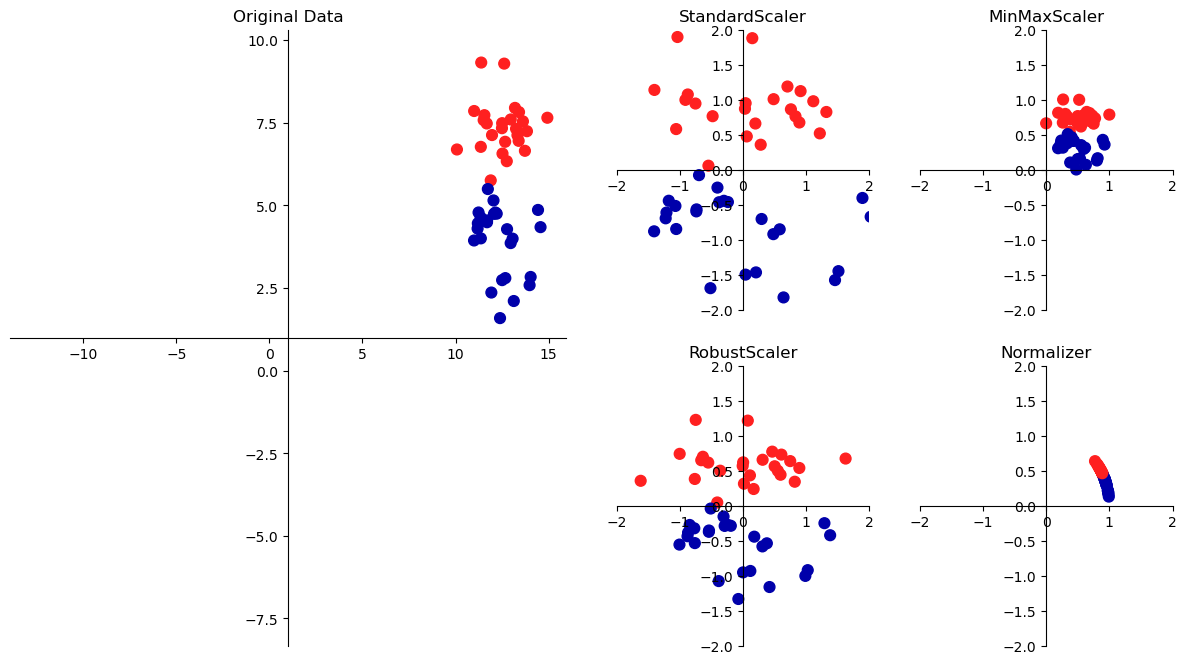

In [2]:
mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1
)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [5]:
X_train_scaled = scaler.transform(X_train)

print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(426, 30)
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [6]:
X_test_scaled = scaler.transform(X_test)

print(X_test_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701 0.87956888
 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736 0.44117231 0.28371044
 0.48703131 0.73863671 0.76717172 0.62928585 1.33685792 0.39057253 0.89612238
 0.79317697 0.84859804 0.74488793 0.9154725  1.13188961 1.07008547 0.92371134
 1.20532319 1.63068851]


In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)


svm = SVC(C=100)
svm.fit(X_train, y_train)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.9413145539906104
0.9440559440559441


In [8]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print(svm.score(X_train_scaled, y_train))
print(svm.score(X_test_scaled, y_test))


1.0
0.965034965034965


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print(svm.score(X_train_scaled, y_train))
print(svm.score(X_test_scaled, y_test))

1.0
0.958041958041958


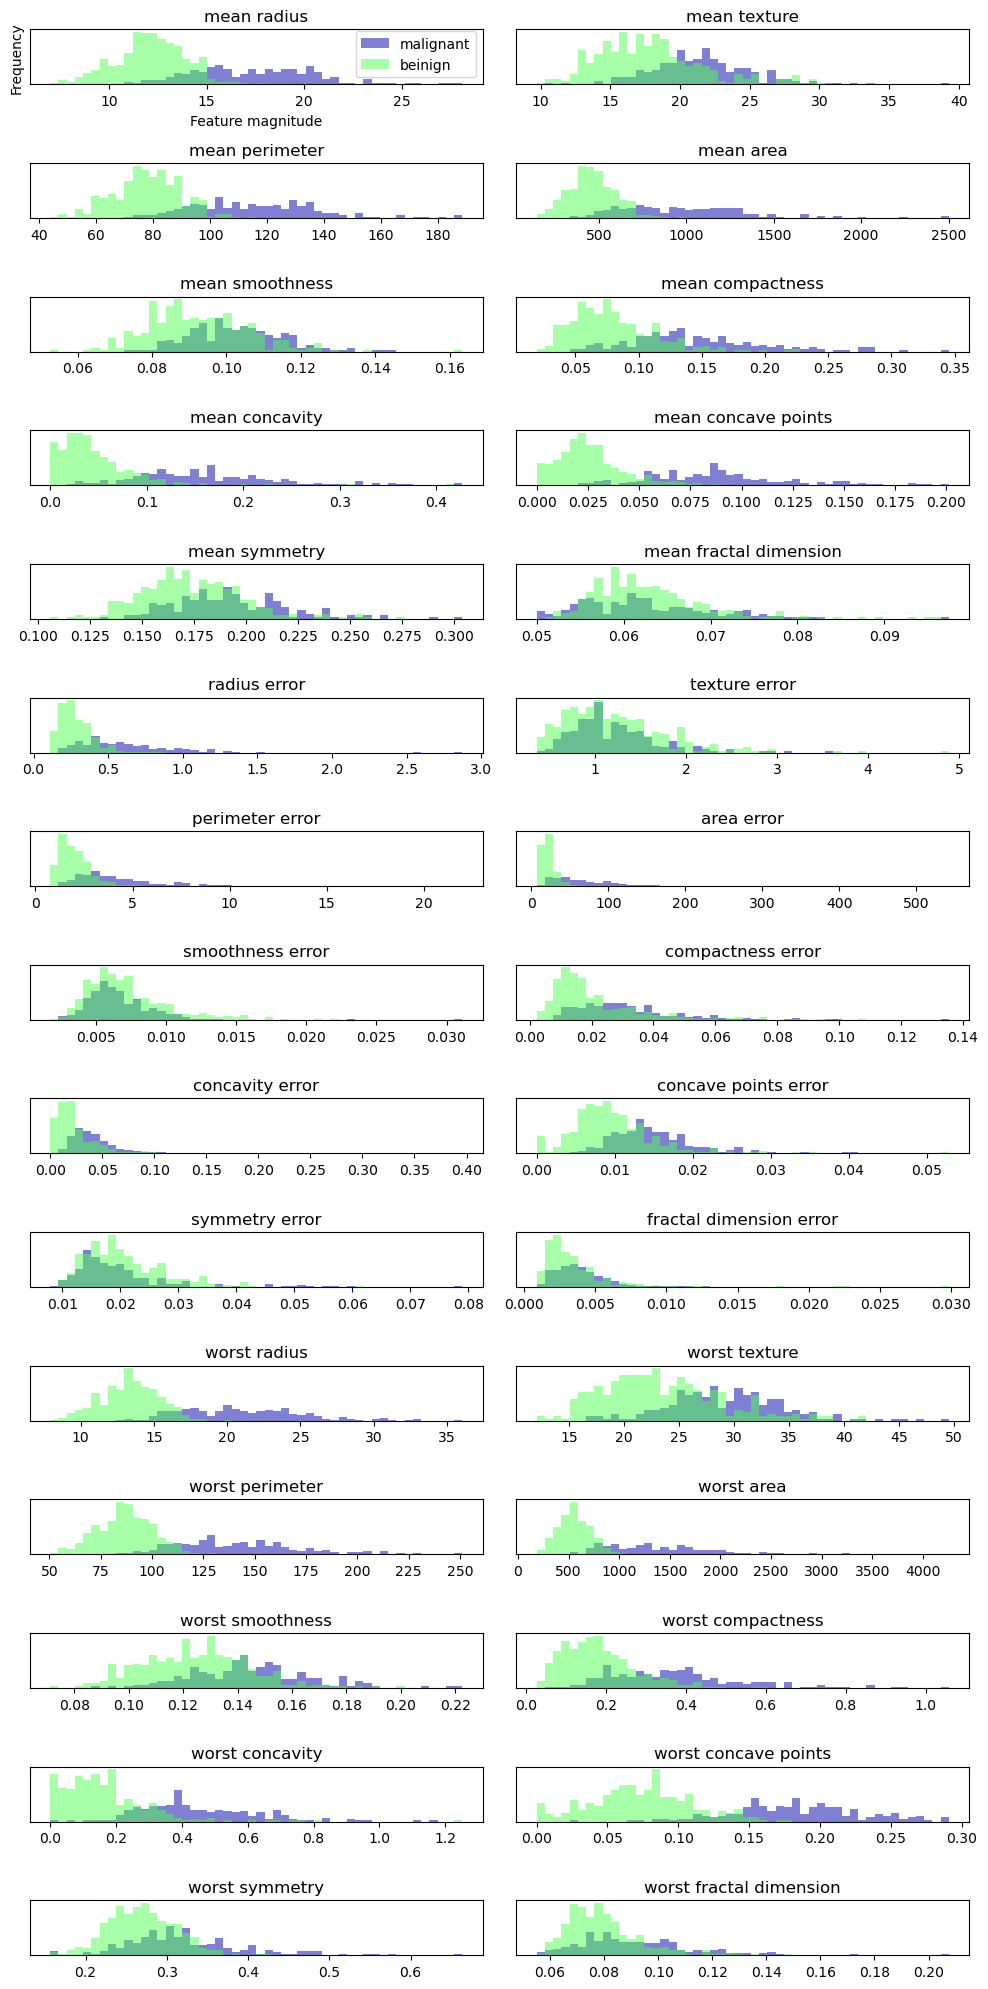

In [10]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "beinign"], loc="best")
fig.tight_layout()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
scaler = StandardScaler()


X_scaled = scaler.fit_transform(cancer.data)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

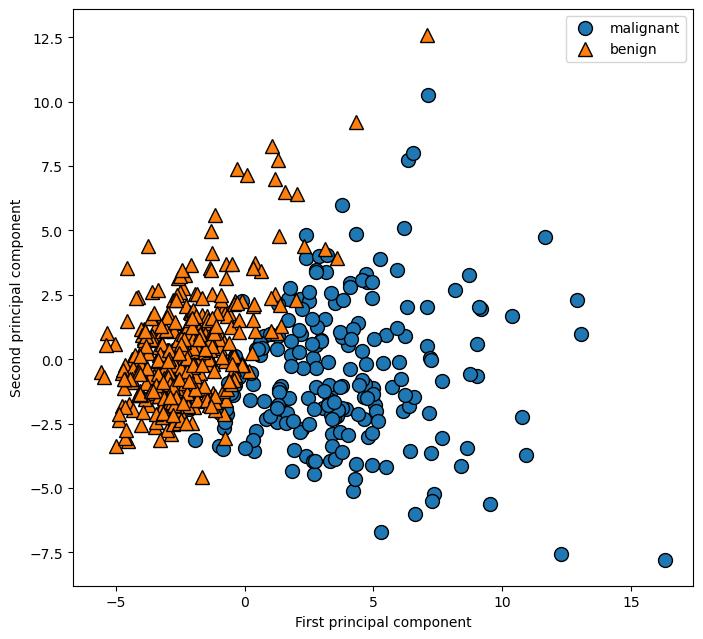

In [13]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [14]:
pca.components_.shape

(2, 30)

In [15]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,0.205979,0.017428,0.211326,0.202870,0.014531,0.170393,0.153590,0.183417,0.042498,0.102568,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,-0.105552,0.089980,-0.089457,-0.152293,0.204430,0.232716,0.197207,0.130322,0.183848,0.280092,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


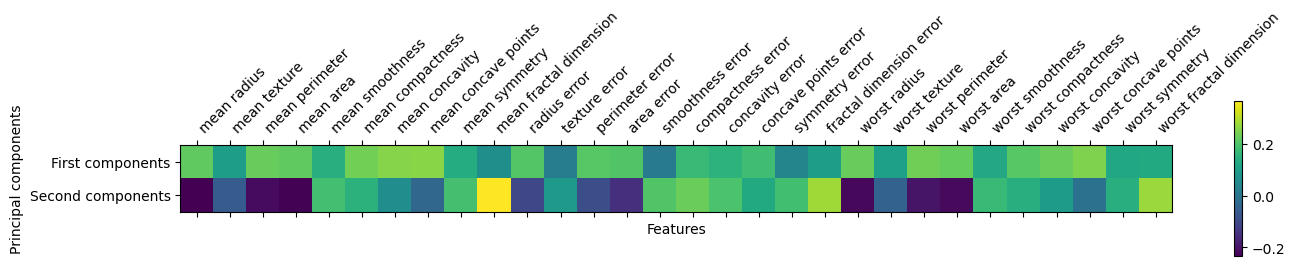

In [16]:
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["First components", "Second components"])
plt.colorbar()
plt.xticks(
    range(len(cancer.feature_names)), cancer.feature_names, rotation=45, ha="left"
)
plt.xlabel("Features")
plt.ylabel("Principal components");

In [17]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

In [18]:
image_shape

(87, 65)

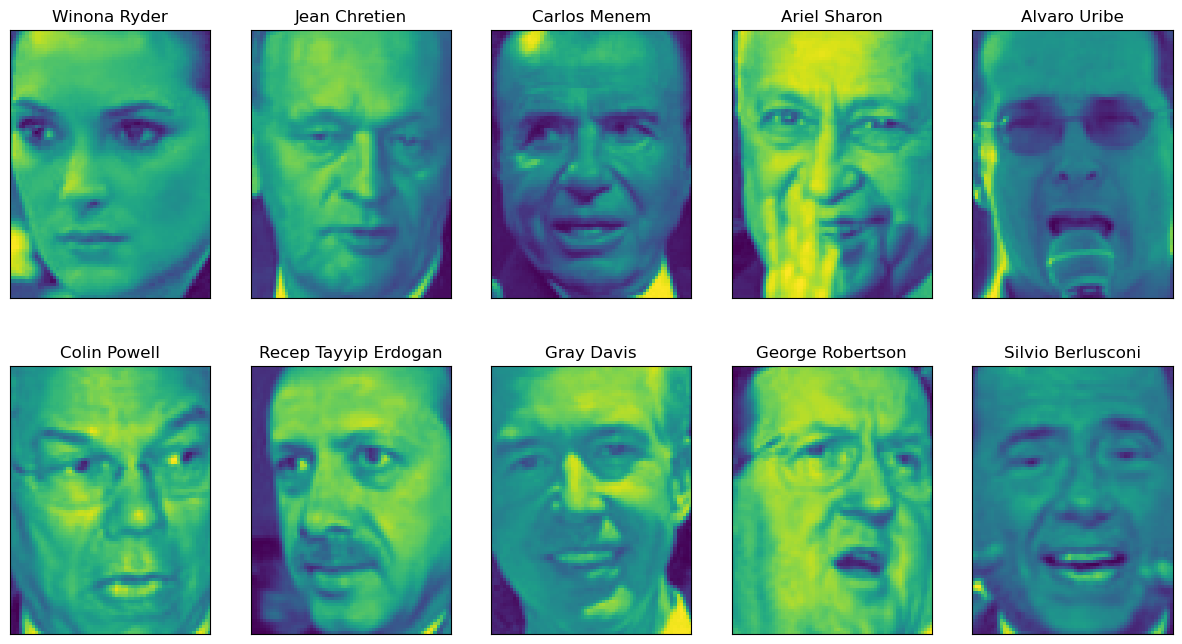

In [19]:
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={"xticks": (), "yticks": ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [20]:
people.images.shape

(3023, 87, 65)

In [21]:
len(people.target_names)

62

In [22]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=" ")
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [23]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo', 'Andre Agassi',
       'Angelina Jolie', 'Ariel Sharon', 'Arnold Schwarzenegger',
       'Atal Bihari Vajpayee', 'Bill Clinton', 'Carlos Menem', 'Colin Powell',
       'David Beckham', 'Donald Rumsfeld', 'George Robertson', 'George W Bush',
       'Gerhard Schroeder', 'Gloria Macapagal Arroyo', 'Gray Davis',
       'Guillermo Coria', 'Hamid Karzai', 'Hans Blix', 'Hugo Chavez',
       'Igor Ivanov', 'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft', 'John Negroponte',
       'Jose Maria Aznar', 'Juan Carlos Ferrero', 'Junichiro Koizumi',
       'Kofi Annan', 'Laura Bush', 'Lindsay Davenport', 'Lleyton Hewitt',
       'Luiz Inacio Lula da Silva', 'Mahmoud Abbas', 'Megawati Sukarnoputri',
       'Michael Bloomberg', 'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer',
       'Pete Sampras', 'Recep Tayyip Erdog

In [24]:
print(people.target)

[61 25  9 ... 14 15 14]


In [25]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale
X_people = X_people / 255

In [26]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [27]:
knn.score(X_test, y_test)

0.21511627906976744

In [28]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [29]:
X_train.shape

(1547, 5655)

In [30]:
X_train_pca.shape

(1547, 100)

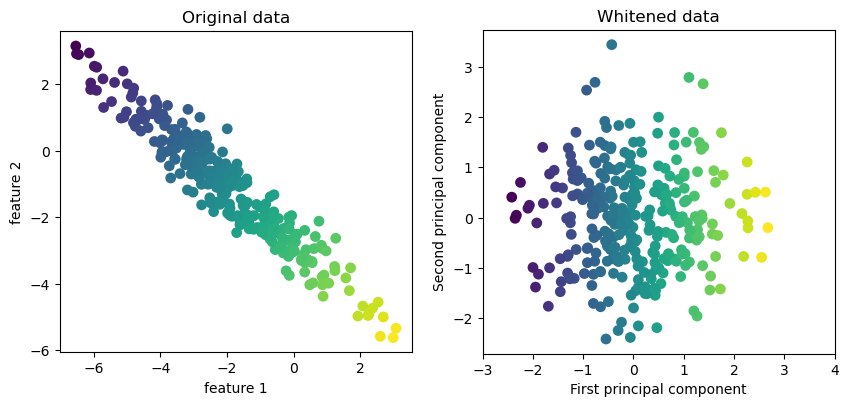

In [31]:
mglearn.plots.plot_pca_whitening()

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.29651162790697677

In [33]:
pca.components_.shape

(100, 5655)

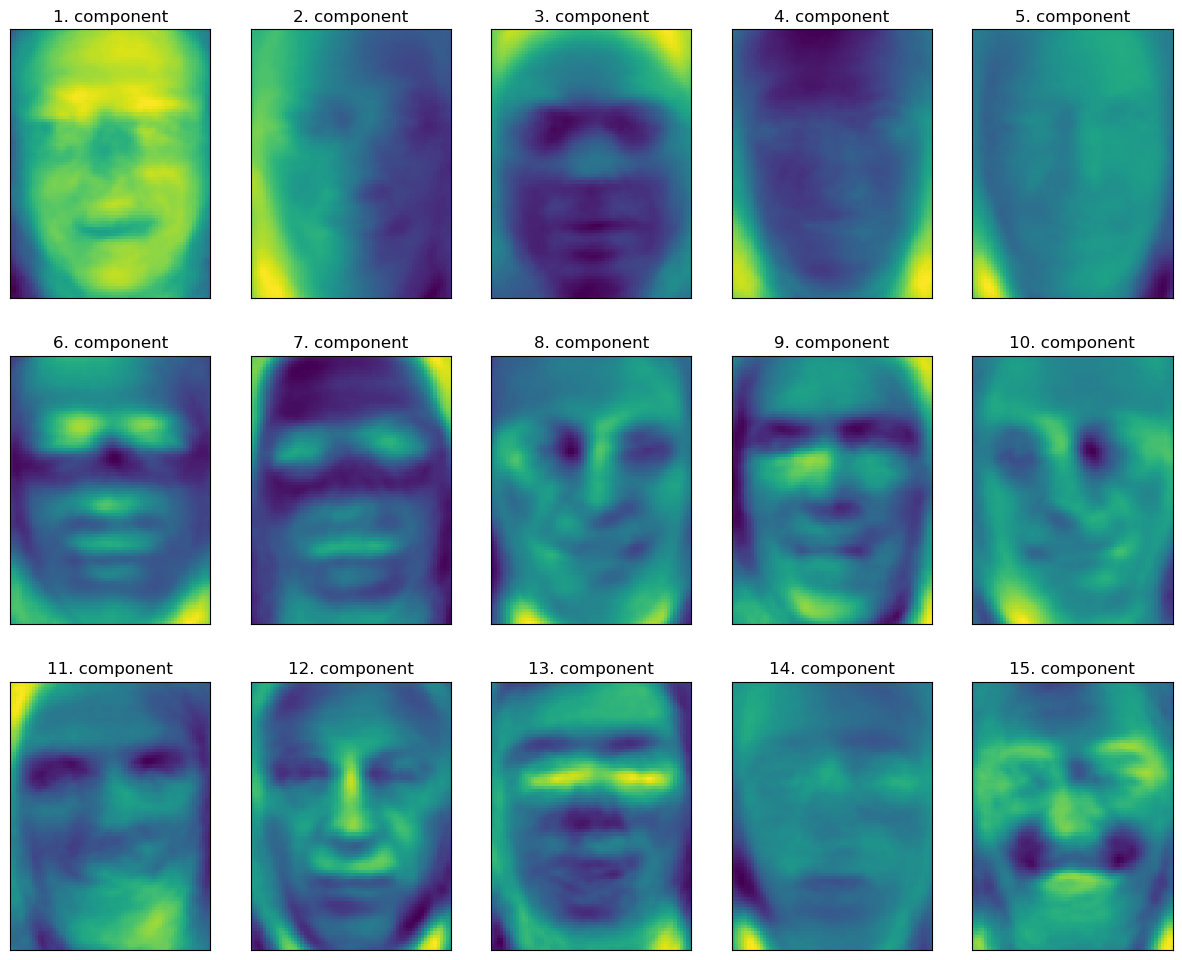

In [34]:
fix, axes = plt.subplots(
    3, 5, figsize=(15, 12), subplot_kw={"xticks": (), "yticks": ()}
)

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="viridis")
    ax.set_title("{}. component".format((i + 1)))

In [35]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)


X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

/Users/franklinaryee/miniforge3/envs/intro-ml/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1728: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


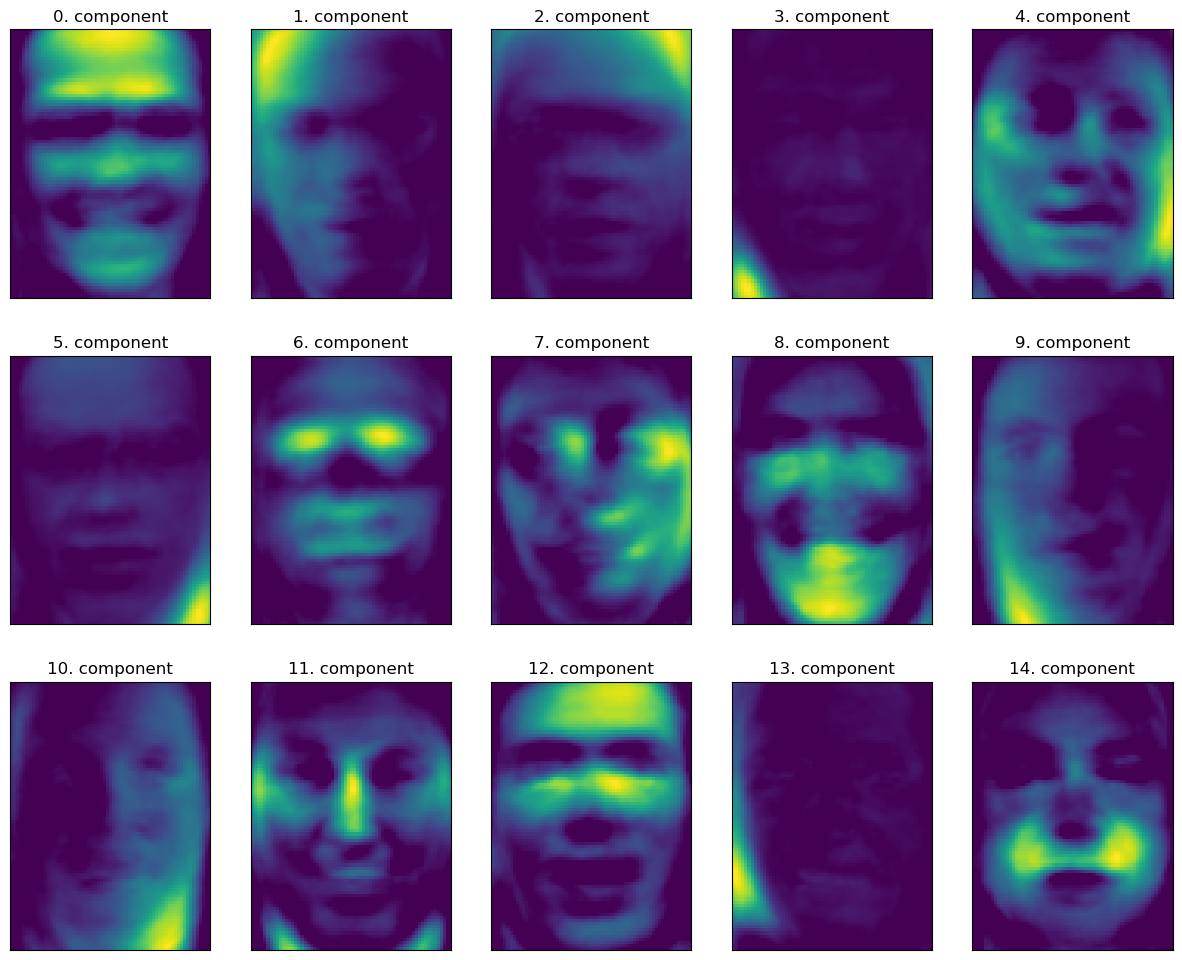

In [36]:
fix, axes = plt.subplots(
    3, 5, figsize=(15, 12), subplot_kw={"xticks": (), "yticks": ()}
)
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

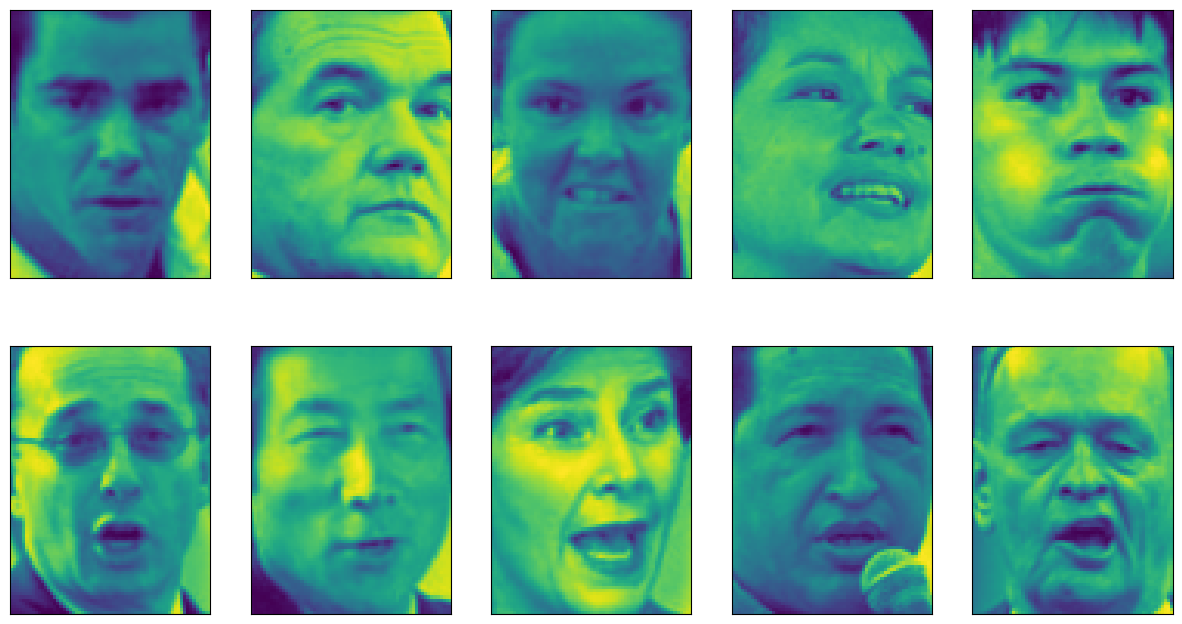

In [37]:
compn = 4
# sort by 4th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={"xticks": (), "yticks": ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

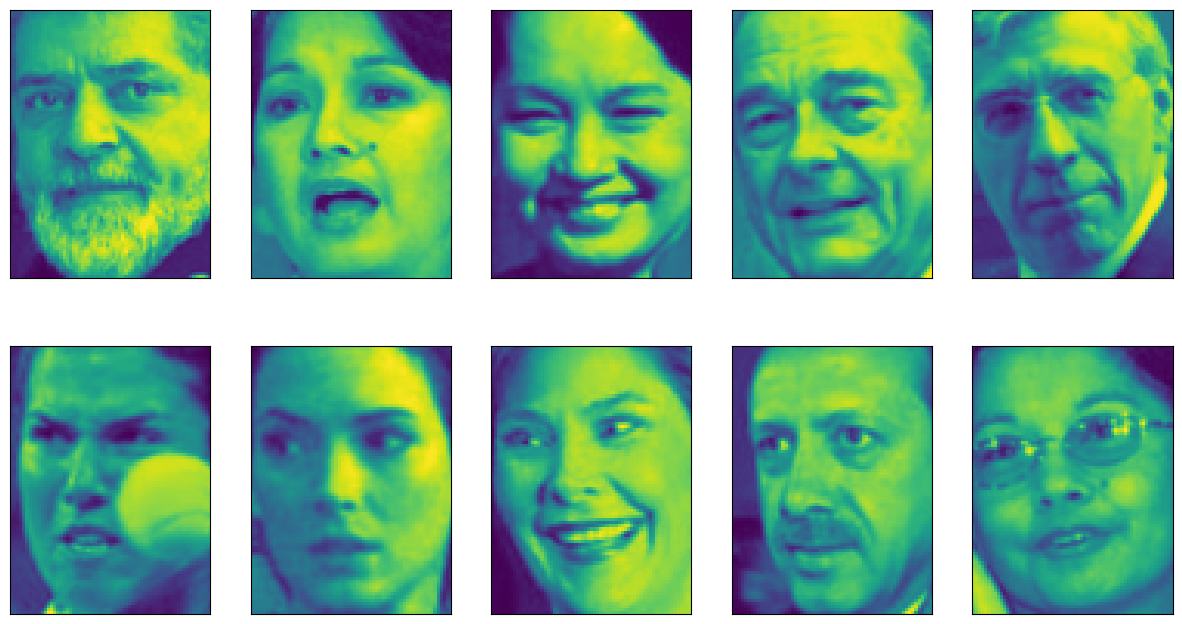

In [38]:
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={"xticks": (), "yticks": ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

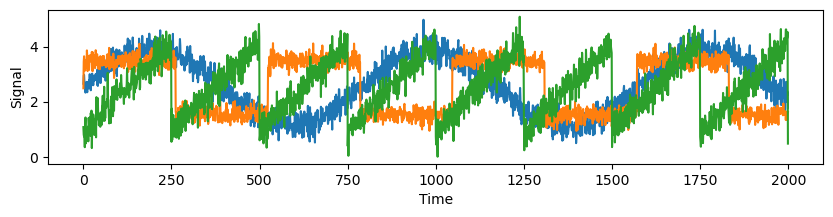

In [39]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(10, 2))
plt.plot(S, "-")
plt.xlabel("Time")
plt.ylabel("Signal")

In [40]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)

print(X.shape)

(2000, 100)


In [41]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print(f"Recovered signal shape {S_.shape}")

Recovered signal shape (2000, 3)


In [42]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

In [43]:
models = [X, S, S_, H]

names = [
    "Observations (first three measurements)",
    "True sources",
    "NMF recovered signals",
    "PCA recovered signals",
]

In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create 4-row subplot layout
fig = make_subplots(
    rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.07, subplot_titles=names
)

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
# Add each model as its own row
for i, (model, name) in enumerate(zip(models, names), start=1):
    # Plot the first three signals
    for j in range(3):
        fig.add_trace(
            go.Scatter(
                y=model[:, j],
                # mode='lines',
                line=dict(color=colors[j], width=1.5),
            ),
            row=i,
            col=1,
        )

# Update layout
fig.update_layout(
    height=800,
    width=900,
    showlegend=False,  # hides legend (optional)
    title_text="Signal Decomposition Comparison",
    # template="plotly_white"
)

fig.show()

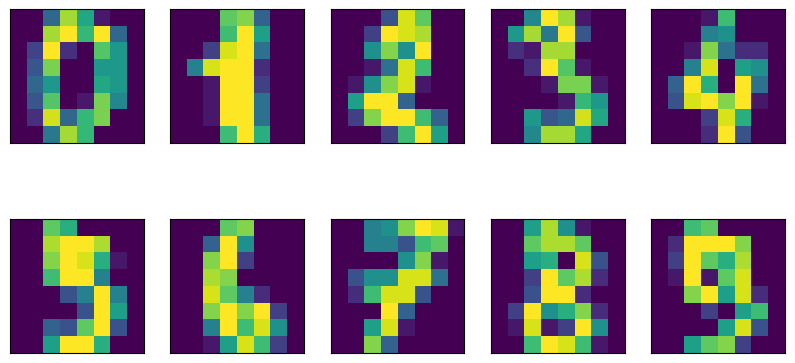

In [45]:
from sklearn.datasets import load_digits

digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={"xticks": (), "yticks": ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

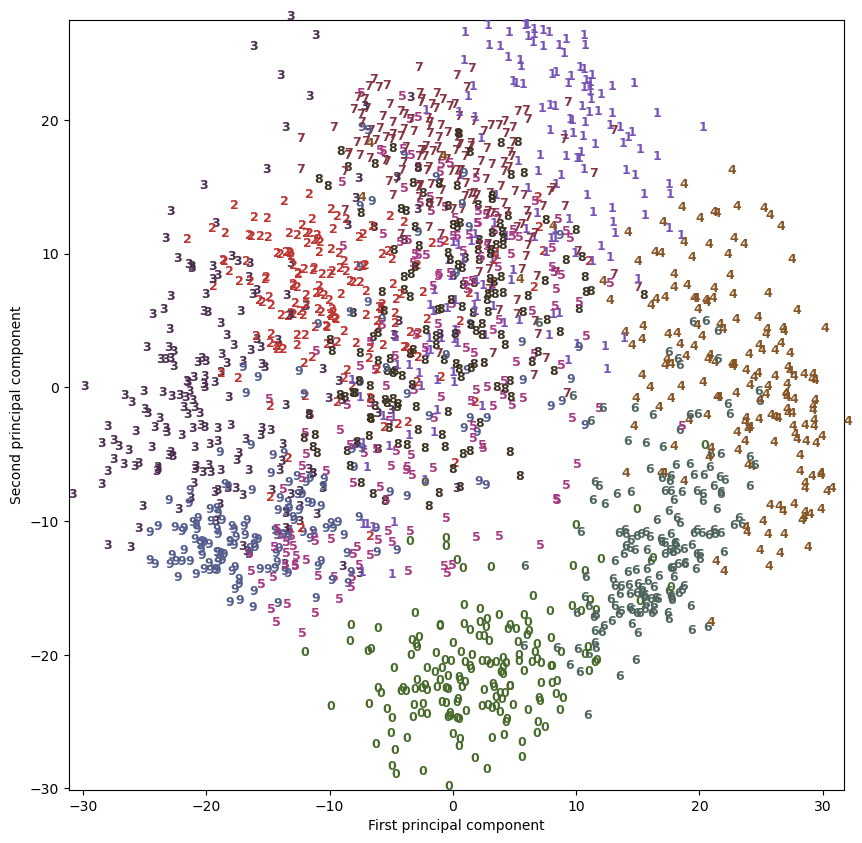

In [47]:
pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)
colors = [
    "#476A2A",
    "#7851B8",
    "#BD3430",
    "#4A2D4E",
    "#875525",
    "#A83683",
    "#4E655E",
    "#853541",
    "#3A3120",
    "#535D8E",
]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(
        digits_pca[i, 0],
        digits_pca[i, 1],
        str(digits.target[i]),
        color=colors[digits.target[i]],
        fontdict={"weight": "bold", "size": 9},
    )
plt.xlabel("First principal component")
plt.ylabel("Second principal component");

In [49]:
len(digits_pca)

1797

In [63]:
digits_pca[:5, :]

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       [-15.90610526,  -3.33246429],
       [ 23.30686741,  -4.26906083]])

In [65]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

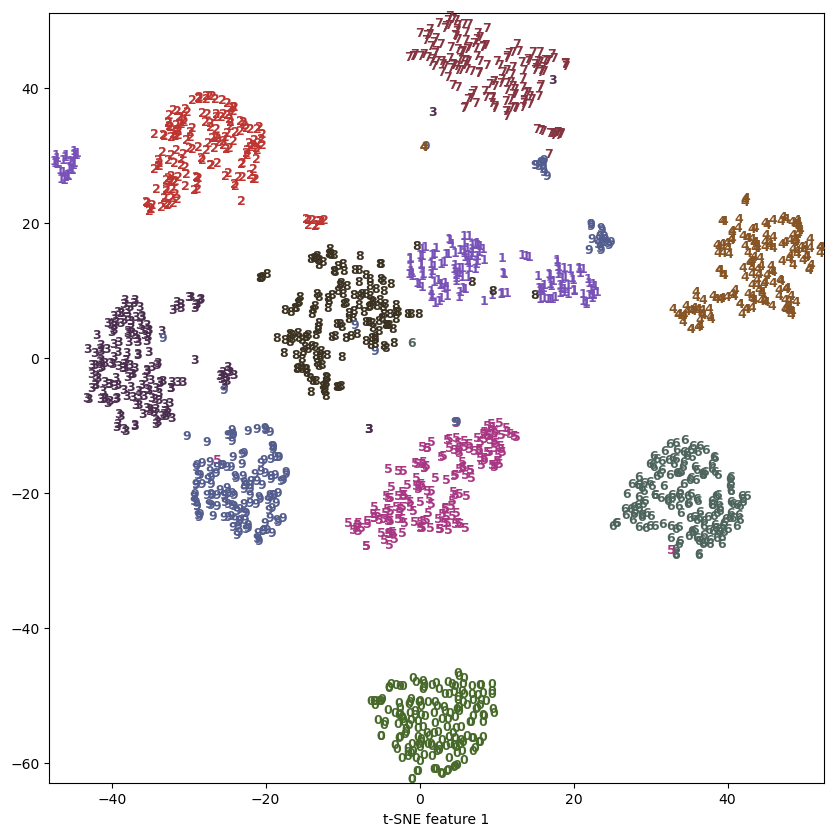

In [69]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(
        digits_tsne[i, 0],
        digits_tsne[i, 1],
        str(digits.target[i]),
        color=colors[digits.target[i]],
        fontdict={"weight": "bold", "size": 9},
    )
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1");

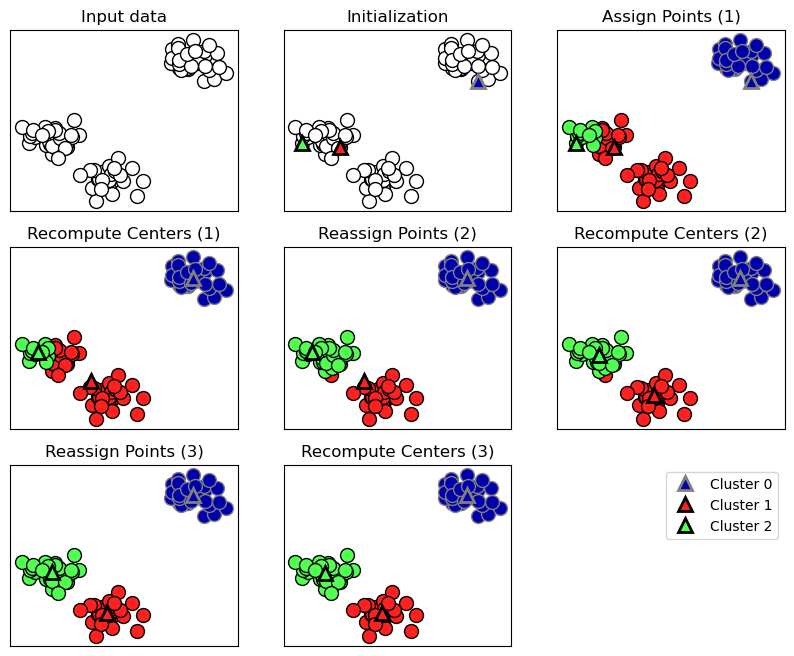

In [70]:
# Clustering
mglearn.plots.plot_kmeans_algorithm()

In [72]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [73]:
kmeans.labels_

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0,
       1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

In [75]:
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0,
       1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1], dtype=int32)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)


X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

/Users/franklinaryee/miniforge3/envs/intro-ml/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1728: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



Text(0, 0.5, 'nmf')

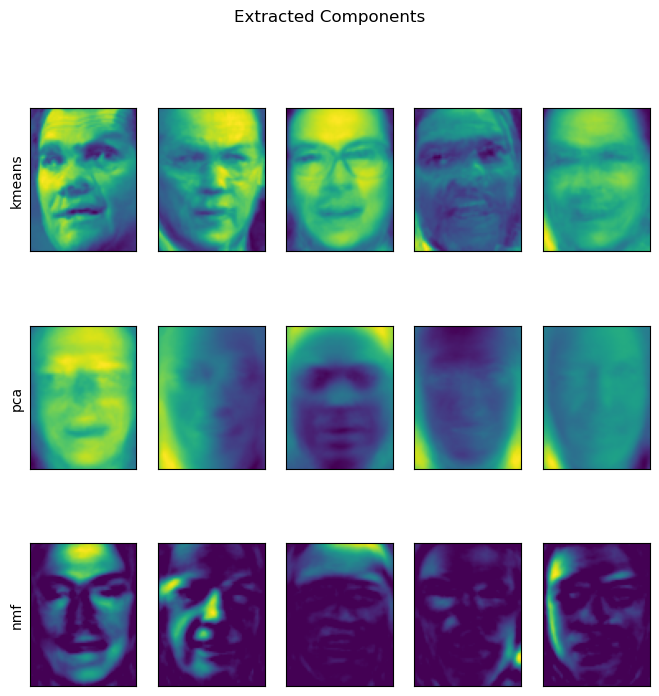

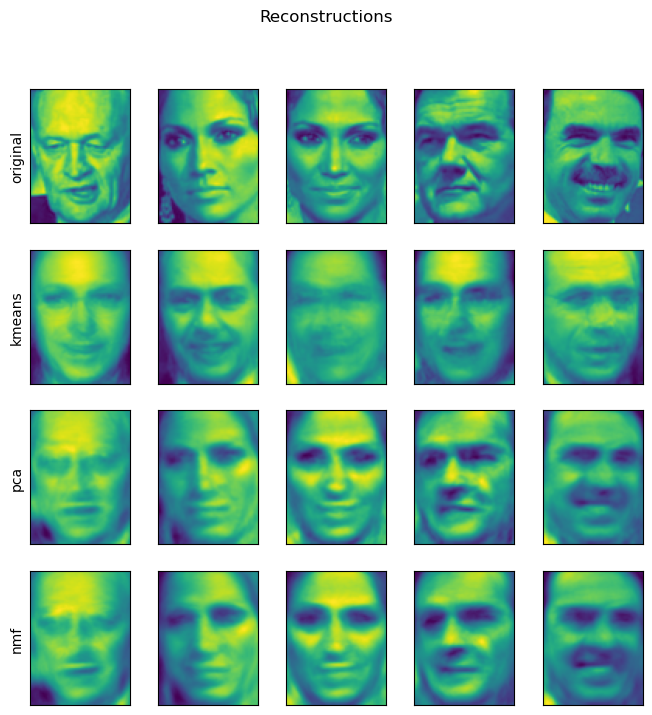

In [84]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={"xticks": (), "yticks": ()})

fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_
):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap="viridis")
    ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={"xticks": (), "yticks": ()}, figsize=(8, 8))
fig.suptitle("Reconstructions")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf
):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Cluster memberships:
[8 4 6 3 1 1 5 2 8 4 9 2 1 4 7 5 0 2 0 7 1 2 0 4 9 6 1 1 6 0 8 9 2 6 8 1 2 5 3 6 2 7 8 6 4 9 5 7 6 2 7 2 1 3 4 8 0 4 0 9 2 3 1 8 4 3 9 4 9 3 2 3 2 6 2 3 6 8 0 2 1 9 2 1 6 9 5 9 2 1 0 5 1 7 1 1 4 2 3 6 4 1 9 5 3 6 3 7 4 0 7 9 9
 3 8 4 8 1 2 8 8 7 6 9 6 7 5 6 4 1 5 7 3 6 4 4 4 3 1 8 6 6 0 9 7 5 6 4 0 6 2 4 8 0 2 9 4 2 0 0 6 4 0 4 2 1 0 2 4 2 0 3 3 7 6 2 1 7 7 0 4 3 1 4 1 0 9 2 3 7 3 0 8 5 6 7 1 6 9 4]


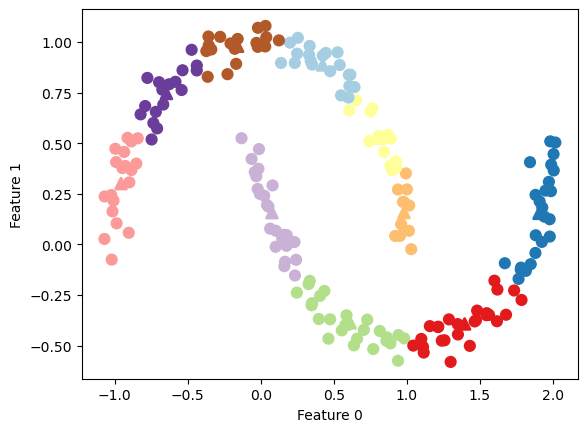

In [99]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap="Paired")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=60,
    marker="^",
    c=range(kmeans.n_clusters),
    linewidth=2,
    cmap="Paired",
)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

In [100]:
distance_features = kmeans.transform(X)
print(distance_features.shape)
print(distance_features)

(200, 10)
[[0.53664613 1.15017588 0.93237626 ... 1.48034956 0.002907   1.07736639]
 [1.74138152 0.60592307 1.00666225 ... 2.52921971 1.20779969 2.23716489]
 [0.75710543 1.93145038 0.91586549 ... 0.78321505 0.87573753 0.71838465]
 ...
 [0.9274342  1.73811046 0.57899268 ... 1.11471941 0.83358544 1.04125672]
 [0.3227627  1.97647071 1.47861069 ... 0.81425026 0.84551232 0.28446737]
 [1.63322944 0.47226506 1.02289983 ... 2.46626118 1.09767675 2.14812753]]


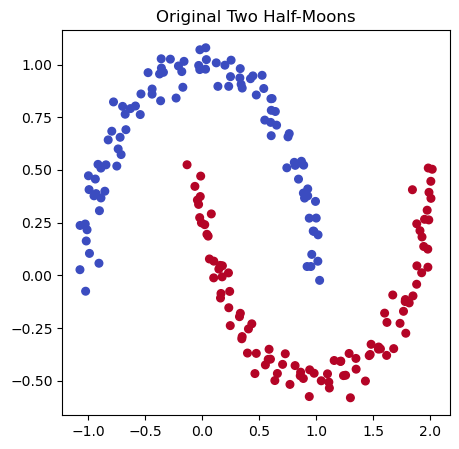

In [102]:
# Proof

# Create the half-moon dataset
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Visualize original data
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=30)
plt.title("Original Two Half-Moons")
plt.show()

In [105]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Fit Kmeans
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)

# 1. use cluster assignments
clusters = kmeans.predict(X)

encoder = OneHotEncoder()
X_clusters = encoder.fit_transform(clusters.reshape(-1, 1))

# fit linear classifier
lr1 = LogisticRegression(max_iter=500)
lr1.fit(X_clusters, y)
print(lr1.score(X_clusters, y))

# 2. use distances to each cluster center
X_distances = kmeans.transform(X)

# fit linear classifier
lr2 = LogisticRegression()
lr2.fit(X_distances, y)
print(lr2.score(X_distances, y))


1.0
0.945


In [106]:
X_distances

array([[0.53664613, 1.15017588, 0.93237626, ..., 1.48034956, 0.002907  , 1.07736639],
       [1.74138152, 0.60592307, 1.00666225, ..., 2.52921971, 1.20779969, 2.23716489],
       [0.75710543, 1.93145038, 0.91586549, ..., 0.78321505, 0.87573753, 0.71838465],
       ...,
       [0.9274342 , 1.73811046, 0.57899268, ..., 1.11471941, 0.83358544, 1.04125672],
       [0.3227627 , 1.97647071, 1.47861069, ..., 0.81425026, 0.84551232, 0.28446737],
       [1.63322944, 0.47226506, 1.02289983, ..., 2.46626118, 1.09767675, 2.14812753]], shape=(200, 10))

In [107]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

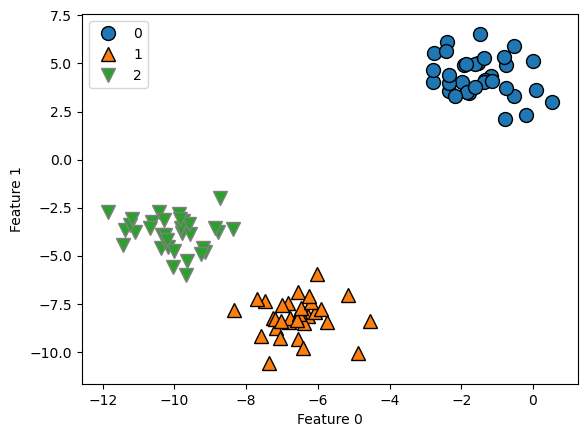

In [111]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(loc="best");

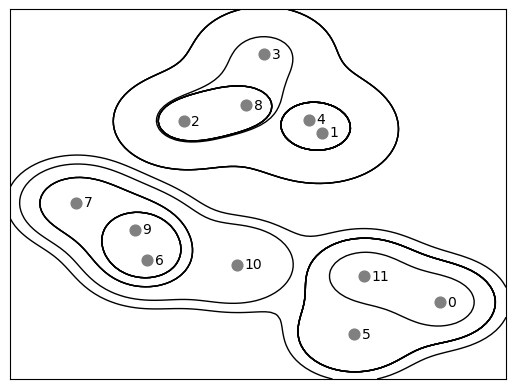

In [113]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Cluster distance')

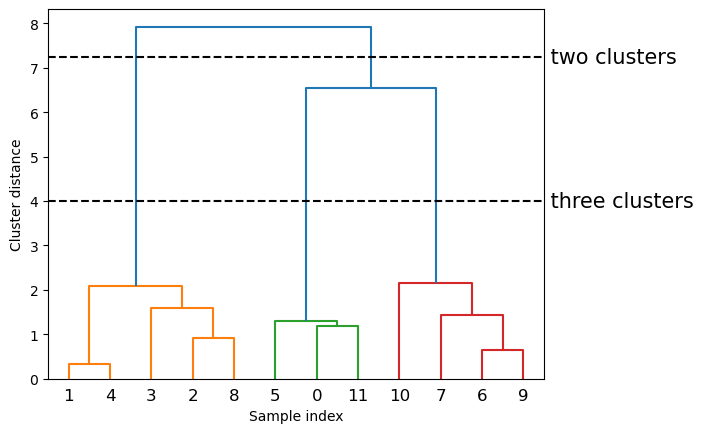

In [123]:
from scipy.cluster.hierarchy import dendrogram, ward


X, y = make_blobs(random_state=0, n_samples=12)

linkage_array = ward(X)
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--'
, c='k')
ax.plot(bounds, [4, 4], '--'
, c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [ ]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_ predict